In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv("../data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df1 = pd.read_csv("../data/HistoricalData20210517.csv", parse_dates=["Date"])
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna()

In [4]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [5]:
df = df[["Timestamp", "Close"]]

In [6]:
df["DateTime"] = pd.to_datetime(df['Timestamp'],unit='s')
df["Date"] = df["DateTime"].dt.date
df["Time"] = df["DateTime"].dt.time

In [7]:
df = df[["Date","Time", "Close"]]
df["real"] = 1

In [8]:
df =df.reset_index(drop=True)

In [9]:
df = df.groupby("Date").max("Time")

In [10]:
df = df.reset_index()
df.head()

,Date,Close,real
0,2011-12-31,4.58,1
1,2012-01-01,5.00,1
2,2012-01-02,5.00,1
3,2012-01-03,5.32,1
4,2012-01-04,5.57,1


In [11]:
df1.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-17,44847.2,NaN,44482.0,45231.4,43186.8
1,2021-05-16,43493.4,NaN,48167.2,46545.4,43072.5
2,2021-05-15,47875.9,NaN,50046.3,48323.8,46574.6
3,2021-05-14,49762.8,NaN,49176.2,50640.9,49303.7
4,2021-05-13,49391.5,NaN,50260.7,50387.3,49258.0


In [12]:
df1 = df1.sort_values(by="Date")
df1 = df1.reset_index(drop=True)
df1 = df1[["Date", "Close/Last"]]
df1.columns = ["Date", "Close"]
df1["Date"] = df1["Date"].dt.date
df1["real"] = 1
df1.head()

,Date,Close,real
0,2019-03-08,3865.9,1
1,2019-03-09,3944.4,1
2,2019-03-10,3915.2,1
3,2019-03-11,3865.1,1
4,2019-03-12,3886.0,1


In [13]:
max_date_df = max(df["Date"])
df1.loc[df1["Date"]>max_date_df]

,Date,Close,real
688,2021-04-01,59733.7,1
689,2021-04-02,59205.3,1
690,2021-04-03,57325.1,1
691,2021-04-04,57555.1,1
692,2021-04-05,58800.4,1
693,2021-04-06,57907.1,1
694,2021-04-07,56580.9,1
695,2021-04-08,58081.2,1
696,2021-04-09,59119.4,1
697,2021-04-10,60319.8,1


In [14]:
max_date_df

datetime.date(2021, 3, 31)

In [15]:
df = pd.concat([df, df1.loc[df1["Date"]>max_date_df]])


In [16]:
df = df.reset_index(drop=True)
df.head()
df.tail()

,Date,Close,real
3418,2021-05-13,49391.5,1
3419,2021-05-14,49762.8,1
3420,2021-05-15,47875.9,1
3421,2021-05-16,43493.4,1
3422,2021-05-17,44847.2,1


In [17]:
# change here
dataset = df[['Close']].values

training_len = int(len(dataset)*0.8)
training_len

2738

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler().fit(dataset)

In [20]:
data_scaled = scaler.transform(dataset)

In [21]:
train_data = data_scaled[:training_len, :]

In [22]:
X_train = []
y_train = []
n_days = 60

In [23]:
for i in range(n_days, len(train_data)):
    X_train.append(train_data[i-n_days:i, 0])
    y_train.append(train_data[i, 0])

In [24]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [27]:
model = Sequential()

In [28]:
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [30]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

2678/2678 [==============================] - 56s 19ms/step - loss: 3.0247e-04


In [31]:
test_data = data_scaled[training_len - n_days: , :]

In [32]:
X_test = []
y_test = dataset[training_len: , :]

In [33]:
for i in range(n_days, len(test_data)):
    X_test.append(test_data[i-n_days:i, 0])

In [34]:
X_test = np.array(X_test)

In [35]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [36]:
prediction = model.predict(X_test)

In [37]:
prediction = scaler.inverse_transform(prediction)
prediction

array([[13024.359 ],
       [12768.953 ],
       [12681.667 ],
       [12565.516 ],
       [12521.521 ],
       [12500.553 ],
       [12653.661 ],
       [12953.552 ],
       [13349.938 ],
       [13501.022 ],
       [13480.069 ],
       [13357.424 ],
       [13126.191 ],
       [12800.84  ],
       [12478.002 ],
       [12000.281 ],
       [11686.009 ],
       [11511.971 ],
       [11504.378 ],
       [11530.254 ],
       [11538.226 ],
       [11468.005 ],
       [11289.637 ],
       [11145.362 ],
       [10981.614 ],
       [10898.575 ],
       [10758.094 ],
       [10628.581 ],
       [10536.382 ],
       [10550.359 ],
       [10692.481 ],
       [10910.5625],
       [11179.136 ],
       [11454.606 ],
       [11864.101 ],
       [12342.061 ],
       [12730.112 ],
       [12990.859 ],
       [13136.249 ],
       [13182.781 ],
       [13090.126 ],
       [12934.414 ],
       [12752.716 ],
       [12473.737 ],
       [12111.66  ],
       [11790.253 ],
       [11531.759 ],
       [11359

In [38]:
rmse = np.sqrt(np.mean(prediction - y_test) ** 2)

In [39]:
print(rmse)

1322.2132704721714


In [40]:
import matplotlib.pyplot as plt 

In [41]:
train_df = df[:training_len]
predict_df = df[training_len:]
predict_df["Prediction"] = prediction

<ipython-input-41-7023947fc77e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df["Prediction"] = prediction


<AxesSubplot:xlabel='Date'>

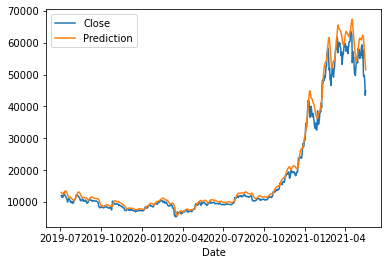

In [42]:
predict_df.plot.line(x="Date", y=["Close", "Prediction"])

In [43]:
predict_df = predict_df.reset_index(drop=True)
predict_df.tail()

,Date,Close,real,Prediction
680,2021-05-13,49391.5,1,60021.843750
681,2021-05-14,49762.8,1,57731.363281
682,2021-05-15,47875.9,1,55755.824219
683,2021-05-16,43493.4,1,53888.007812
684,2021-05-17,44847.2,1,51489.046875


In [44]:
# to predict next day price
def predict_nextday(df_source):
    new_df = df_source.filter(["Close"])
    last_n_days = new_df[-60:].values
    last_n_days_scaled = scaler.transform(last_n_days)
    X_test = []
    X_test.append(last_n_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predict = model.predict(X_test)
    predict = scaler.inverse_transform(predict)
    return predict

def predict_nextday_dict(df_source):
    max_date = max(df_source["Date"])
    new_df = df_source.filter(["Close"])
    last_n_days = new_df[-60:].values
    last_n_days_scaled = scaler.transform(last_n_days)
    X_test = []
    X_test.append(last_n_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predict = model.predict(X_test)
    predict = scaler.inverse_transform(predict)
    return {max_date, predict[0,0]}

In [45]:
predict_nextday_dict(df)

{datetime.date(2021, 5, 17), 49659.96}

In [46]:
model.save("bitcoin_model_trained.h5")